All Rows and Columns of the Retail Sales Dataset:
                  Retail_Sales
observation_date              
1992-01-01              146925
1992-02-01              147223
1992-03-01              146805
1992-04-01              148032
1992-05-01              149010
1992-06-01              149800
1992-07-01              150761
1992-08-01              151067
1992-09-01              152588
1992-10-01              153521
1992-11-01              153583
1992-12-01              155614
1993-01-01              157555
1993-02-01              156266
1993-03-01              154752
1993-04-01              158979
1993-05-01              160605
1993-06-01              160127
1993-07-01              162816
1993-08-01              162506
1993-09-01              163258
1993-10-01              164685
1993-11-01              166594
1993-12-01              168161
1994-01-01              167518
1994-02-01              169649
1994-03-01              172766
1994-04-01              173106
1994-05-01          

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


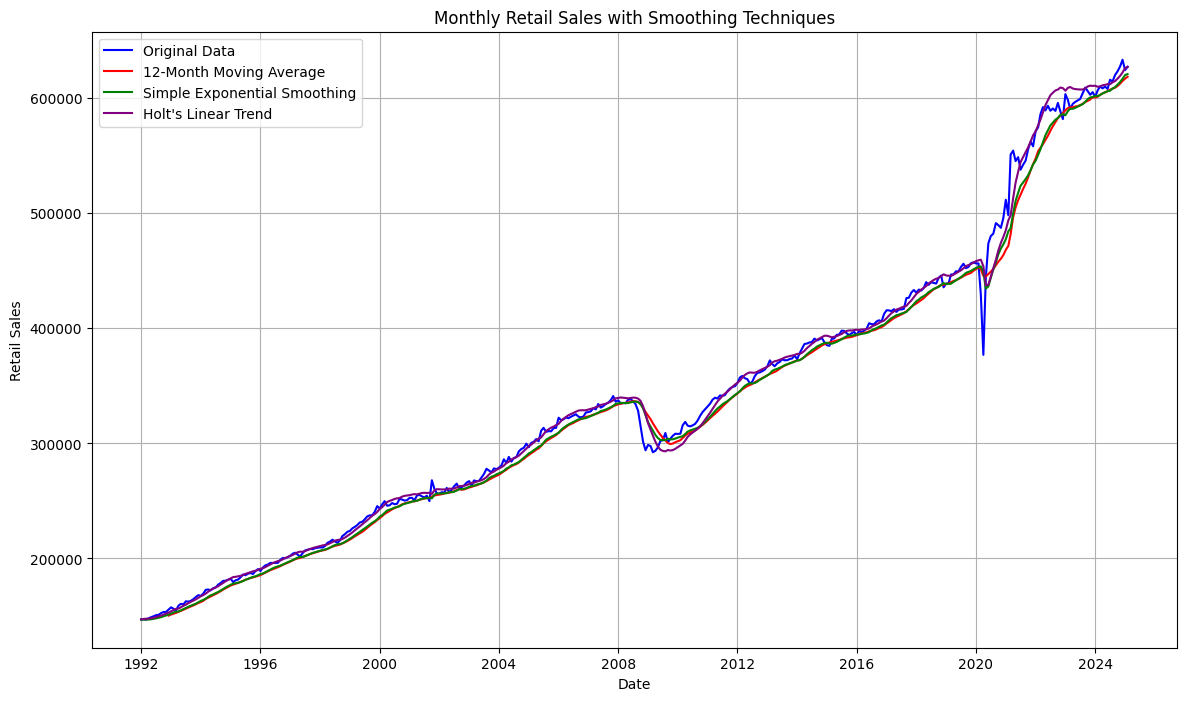


Dataset with Smoothing Calculations:
                  Retail_Sales  Moving_Average   SES_Forecast  Holt_Forecast
observation_date                                                            
1992-01-01              146925             NaN  146925.000000  147223.000000
1992-02-01              147223             NaN  146925.000000  147455.440000
1992-03-01              146805             NaN  146984.600000  147696.343200
1992-04-01              148032             NaN  146948.680000  147787.638896
1992-05-01              149010             NaN  147165.344000  148110.962675
1992-06-01              149800             NaN  147534.275200  148583.202444
1992-07-01              150761             NaN  147987.420160  149143.330211
1992-08-01              151067             NaN  148542.136128  149815.985820
1992-09-01              152588             NaN  149047.108902  150440.330591
1992-10-01              153521             NaN  149755.287122  151286.959796
1992-11-01              153583        

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt

# Load the Monthly Retail Sales Data from FRED
file_path = 'C:/Users/USER/Downloads/RSXFS.csv'
try:
    df = pd.read_csv(file_path, parse_dates=['observation_date'], index_col='observation_date')
    df.columns = ['Retail_Sales']  # Rename the column for easier handling
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please make sure the retail sales dataset is in your Downloads folder.")
    exit()

# Enable showing all rows and columns (optional, but good for inspection)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print("All Rows and Columns of the Retail Sales Dataset:")
print(df)

# 1. Moving Average
window_size = 12  # Example: 12-month moving average
df['Moving_Average'] = df['Retail_Sales'].rolling(window=window_size).mean()

# 2. Simple Exponential Smoothing
# Fit the model
fit_ses = SimpleExpSmoothing(df['Retail_Sales']).fit(smoothing_level=0.2, optimized=False)
df['SES_Forecast'] = fit_ses.fittedvalues

# 3. Holt's Linear Trend Method (Double Exponential Smoothing)
fit_holt = Holt(df['Retail_Sales']).fit(smoothing_level=0.2, smoothing_trend=0.1, optimized=False)
df['Holt_Forecast'] = fit_holt.fittedvalues

# Visualization
plt.figure(figsize=(14, 8))
plt.plot(df.index, df['Retail_Sales'], label='Original Data', color='blue')
plt.plot(df.index, df['Moving_Average'], label=f'{window_size}-Month Moving Average', color='red')
plt.plot(df.index, df['SES_Forecast'], label='Simple Exponential Smoothing', color='green')
plt.plot(df.index, df['Holt_Forecast'], label="Holt's Linear Trend", color='purple')
plt.title('Monthly Retail Sales with Smoothing Techniques')
plt.xlabel('Date')
plt.ylabel('Retail Sales')
plt.legend()
plt.grid(True)
plt.show()

print("\nDataset with Smoothing Calculations:")
print(df)

print("\nRemember to complete the Excel part of the assignment and write your reflection comparing Excel, R, and Python for smoothing techniques.")